In [2]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# html img map
json_data_sales = open('./out/cleanAsinSimilarProductsPriceBrandImageDict.json').read()
json_data = open('./out/HomeKitchenFinal2.json').read()
sales_data = json.loads(json_data_sales)
review_description_data = json.loads(json_data)

In [4]:
for key in sales_data :
    print(  sales_data[key].keys()  )

dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['s

dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])

dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_key

dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'bra

In [5]:
from collections import defaultdict

In [6]:
reverse_price_asin = defaultdict( list )
for key in sales_data :  #some data don't have price
    if 'price' in sales_data[key] :
        price = sales_data[key][ 'price' ]
        reverse_price_asin[ price ].append( key )

reverse_price_asin

defaultdict(list,
            {69.95: ['B0093SLXD8',
              'B004R952PI',
              'B0040M4D0W',
              'B000LTPF96',
              'B003S8KLPU',
              'B001ICUNSI'],
             4.69: ['B000H6AESK',
              'B003OR3H7Y',
              'B000H6CA46',
              'B000H6H44M',
              'B000H6C5PK'],
             167.0: ['B000NPTZY4', 'B005OYC4BU'],
             11.22: ['B00352LOKA'],
             49.06: ['B000J4MIHK'],
             148.75: ['B000MRV7QM'],
             109.34: ['B003IB5TZE'],
             64.43: ['B0046EC0LS'],
             5.57: ['B003O9GH56', 'B0006L7KY2'],
             31.49: ['B000BKBJWW', 'B004XOOGUY', 'B00027EXLI', 'B006IJ3XB0'],
             20.12: ['B005HER56G'],
             23.97: ['B0000CNQX2', 'B00GXJMWUI', 'B003JKL444', 'B004GXAJ4Y'],
             59.99: ['B0027EMTD8',
              'B000FHF2Q0',
              'B004FTOTUY',
              'B00HVC7ZP8',
              'B0096JYGME',
              'B004FTOTS6',
           

In [7]:
sales_list = list( reverse_price_asin.keys() )
sales_list.sort( reverse=True )
top10 = sales_list[:10]
top10

[924.99, 913.0, 899.0, 849.0, 839.0, 799.99, 799.97, 767.95, 699.0, 680.0]

In [8]:
top10data = {}
for entry in top10 :
    asins = reverse_price_asin[entry]
    for asin in asins :
        reviews = review_description_data[ asin ]['reviewBow']
        description = review_description_data[ asin ]['descriptionBow']
        top10data[ asin ] = {'price' : entry, 'reviewBow' : reviews, 'descriptionBow' : description}

In [9]:
def preprocess_level1(  top10data ) :
    reviewDoc = []; descDoc = []
    for asin in top10data :
        reviewStr = " ".join( top10data[asin]['reviewBow'] )
        descStr = " ".join( top10data[asin]['descriptionBow'] )
        reviewDoc.append( reviewStr )
        descDoc.append( descStr )
    return reviewDoc, descDoc

In [10]:
reviewDoc, descDoc = preprocess_level1( top10data )
reviewDoc[:3]

['debated long time steelcase aeron end bought one quite satisfied nt lot fussy controls like steelcase automatically conforms current position body moves around preferable kicker arm broke couple years humanscale sent new arm free sent two new arms since new ones better old ones let see herman miller',
 'model herman miller aeron chair work began telecommuting time knew upgrade home office chair ca nt think type adjustment want ca nt chair adjust height simple lever pull well arm height angle lumbar support far back forward seat back recline oh yes also adjust much pressure need put seat back reclinethe seat back open weave making cool comfortable chairi guess best measure good chair fact expensive sitting one work six years knew product worth costthe product came almost fully assembled got lumbar support option rather posturefit adjustment option lumbar support screw four screws probably took ten minutes assemble including opening package',
 'better looks although may feel little har

In [11]:
def preprocess_level2( documents, no_features = 10, no_topics = 5 ) :
    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(input='content', max_df=5.0, min_df=0.0,max_features=no_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(documents)
    return tf, tf_vectorizer

In [12]:
tf, tf_vectorizer = preprocess_level2( reviewDoc )
tf

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [13]:
no_topics = 5
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,random_state=0)

lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['bed',
 'chair',
 'firm',
 'good',
 'mattress',
 'new',
 'nt',
 'product',
 'support',
 'time']

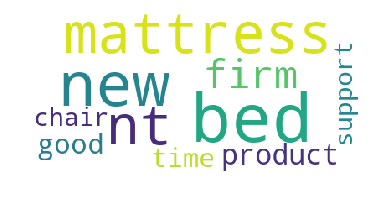

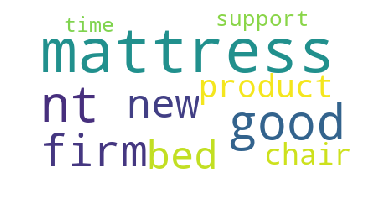

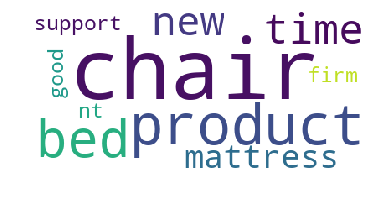

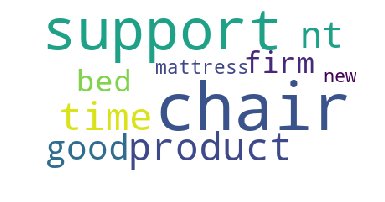

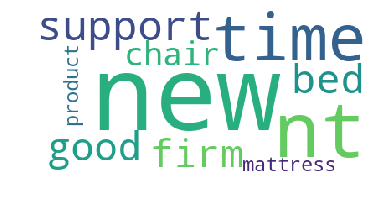

In [41]:
import wordcloud
import math
import matplotlib.pyplot as plt
for i in range ( no_topics ):
    termsInTopic = lda.components_[i].argsort()#[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].strip()),math.ceil(lda.components_[i][term]*1000)))

    
    = {}
    for product,count in termsAndCounts :
        termsAndCountsDict[ product ] = count
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCountsDict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()